In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

#Expensive Visualization Method Outline --------------------------------------------------------------------------

#Establish Domain and n points within
    
#Use shell commands to Modify & Run FENN at each x and y "point"

#Pull parameters from FENN simulation log

#Compute the Cost Function

#Interpolate between points

#Plots

file_path = "/home/ojc/Downloads/UTKCAP/FENN/simulation_log.txt"

'''
COMP = "g++ Networks.cpp -o FENN \
-I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include \
-I/usr/include/eigen3 \
-L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
-Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
-lhdf5_cpp -lhdf5"
'''

'\nCOMP = "g++ Networks.cpp -o FENN -I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include -I/usr/include/eigen3 -L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib -Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib -lhdf5_cpp -lhdf5"\n'

In [2]:
#Establish domain

EpsA_range=(1.0e-01, 1.0e-06)#Hi to Low
EpsR_range=(1.0e-01, 1.0e-06)

EpsA_points = []
EpsR_points = []

#tune accuracy - bigger n is more accurate
n = 6

EpsA_step = (max(EpsA_range)-min(EpsA_range))/n
EpsR_step = (max(EpsR_range)-min(EpsR_range))/n

for i in range(n):

    EpsA_points.append(min(EpsA_range)+(i*EpsA_step))
    EpsR_points.append(min(EpsR_range)+(i*EpsR_step))
    
print(EpsA_points) #USE TO PLOT
print(EpsR_points)


[1e-06, 0.016667500000000002, 0.033334, 0.0500005, 0.066667, 0.0833335]
[1e-06, 0.016667500000000002, 0.033334, 0.0500005, 0.066667, 0.0833335]


In [3]:
#Initialize
t_array = [None] * n * n
ERR_array = [None] * n * n

#Shell Commands

#Change working directory!

os.chdir('/home/ojc/Downloads/UTKCAP/FENN')

#Modify FENN

index = 0

for i in range(n):
    
#Fix python -> C++ array bug

    EpsA_value = EpsA_points[i]
    
    for j in range(n):
    
        EpsR_value = EpsR_points[j]
    
        !sed -i "s/double EpsA = [0-9.e+-]*;/double EpsA = {EpsA_value};/" /home/ojc/Downloads/UTKCAP/FENN/Networks.cpp
        !sed -i "s/double EpsR = [0-9.e+-]*;/double EpsR = {EpsR_value};/" /home/ojc/Downloads/UTKCAP/FENN/Networks.cpp

#Compile FENN
    
        !g++ /home/ojc/Downloads/UTKCAP/FENN/Networks.cpp -o FENN \
            -I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include \
            -I/usr/include/eigen3 \
            -L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
            -Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
            -lhdf5_cpp -lhdf5
    
        !rm -f /home/ojc/Downloads/UTKCAP/FENN/simulation_log.txt
    
        !./FENN > /dev/null 2>&1
            
#Read from simulation_log.txt
    
        with open(file_path, 'r') as file:
            for line in file:
                if "Wall-clock time:" in line:
                    t_array[index] = line.split(":")[1].strip() 
                if "Accumulated Error:" in line:
                    ERR_array[index] = line.split(":")[1].strip() 
    
        '''!ls /home/ojc/Downloads/UTKCAP/FENN'''
                
        print(f'Iteration ({((n * i) + j + 1)}): Time = {t_array[index]}, Error = {ERR_array[index]}')

        index = index + 1
        

Iteration (1): Time = 9500986 microseconds, Error = 0.0728388
Iteration (2): Time = 756680 microseconds, Error = 92.5733
Iteration (3): Time = 574817 microseconds, Error = 185.014
Iteration (4): Time = 557594 microseconds, Error = 277.625
Iteration (5): Time = 555345 microseconds, Error = 370.237
Iteration (6): Time = 676248 microseconds, Error = 462.848
Iteration (7): Time = 565555 microseconds, Error = 215.123
Iteration (8): Time = 583380 microseconds, Error = 307.734
Iteration (9): Time = 576475 microseconds, Error = 400.345
Iteration (10): Time = 569370 microseconds, Error = 492.957
Iteration (11): Time = 604254 microseconds, Error = 585.568
Iteration (12): Time = 564670 microseconds, Error = 678.179
Iteration (13): Time = 574846 microseconds, Error = 430.454
Iteration (14): Time = 577403 microseconds, Error = 523.065
Iteration (15): Time = 568966 microseconds, Error = 615.677
Iteration (16): Time = 566297 microseconds, Error = 708.288
Iteration (17): Time = 604964 microseconds, Er

In [4]:
#Fixing time units

for i in range(n * n):
    t_value = t_array[i]
    
    if isinstance(t_value, float):
        continue  
    
    value, unit = t_value.split()
    
    if unit == 'microseconds':
        unit = 1.0e-6
    else:
        print('error in time units')
    
    value = float(value)
    t_array[i] = value * unit

print(t_array)

ERR_array = [float(x) for x in ERR_array]

print(t_array)
print(ERR_array)

[9.500986, 0.75668, 0.574817, 0.5575939999999999, 0.555345, 0.676248, 0.565555, 0.58338, 0.576475, 0.5693699999999999, 0.604254, 0.56467, 0.574846, 0.577403, 0.568966, 0.5662969999999999, 0.604964, 0.576593, 0.633656, 0.637579, 1.360817, 0.604418, 0.5814819999999999, 0.5779719999999999, 0.6041529999999999, 0.581228, 0.6828839999999999, 0.697164, 0.792673, 1.747329, 1.005072, 1.0703129999999998, 0.623103, 0.6133419999999999, 0.652907, 0.6200789999999999]
[9.500986, 0.75668, 0.574817, 0.5575939999999999, 0.555345, 0.676248, 0.565555, 0.58338, 0.576475, 0.5693699999999999, 0.604254, 0.56467, 0.574846, 0.577403, 0.568966, 0.5662969999999999, 0.604964, 0.576593, 0.633656, 0.637579, 1.360817, 0.604418, 0.5814819999999999, 0.5779719999999999, 0.6041529999999999, 0.581228, 0.6828839999999999, 0.697164, 0.792673, 1.747329, 1.005072, 1.0703129999999998, 0.623103, 0.6133419999999999, 0.652907, 0.6200789999999999]
[0.0728388, 92.5733, 185.014, 277.625, 370.237, 462.848, 215.123, 307.734, 400.345, 

In [5]:
#Compute the Cost Function

Cost_array = [[None for _ in range(n)] for _ in range(n)]

for i in range(n):
    
    for j in range (n):
        
        Cost_array[i][j] = np.sqrt(t_array[i]**2 + ERR_array[j]**2)

print (Cost_array) # USE TO PLOT

[[9.5012652032759, 93.05957558393546, 185.25779047309237, 277.78752556580395, 370.3588866275146, 462.9455041783776], [0.7601776852719633, 92.57639244166084, 185.01554734838476, 277.6260311815562, 370.2377732398768, 462.84861852297064], [0.5794135606580503, 92.57508459339094, 185.01489294265878, 277.62559507290297, 370.2374462201028, 462.848356936247], [0.5623313610509731, 92.57497925443373, 185.01484023469263, 277.62555994733054, 370.23741988090404, 462.8483358672351], [0.5601013835105569, 92.57496573566216, 185.01483347037077, 277.62555543946064, 370.2374165006409, 462.8483331633258], [0.6801594285823287, 92.57576996302815, 185.01523587898782, 277.6258236122092, 370.2376175922127, 462.8484940186773]]


[1e-06, 0.016667500000000002, 0.033334, 0.0500005, 0.066667, 0.0833335]
[1e-06, 0.016667500000000002, 0.033334, 0.0500005, 0.066667, 0.0833335]
[[9.5012652032759, 93.05957558393546, 185.25779047309237, 277.78752556580395, 370.3588866275146, 462.9455041783776], [0.7601776852719633, 92.57639244166084, 185.01554734838476, 277.6260311815562, 370.2377732398768, 462.84861852297064], [0.5794135606580503, 92.57508459339094, 185.01489294265878, 277.62559507290297, 370.2374462201028, 462.848356936247], [0.5623313610509731, 92.57497925443373, 185.01484023469263, 277.62555994733054, 370.23741988090404, 462.8483358672351], [0.5601013835105569, 92.57496573566216, 185.01483347037077, 277.62555543946064, 370.2374165006409, 462.8483331633258], [0.6801594285823287, 92.57576996302815, 185.01523587898782, 277.6258236122092, 370.2376175922127, 462.8484940186773]]


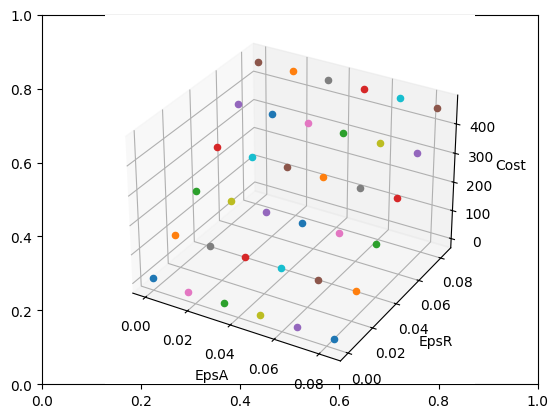

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')

index = 0

for i in range(n):
    
    for j in range (n):
    
        ax.scatter(EpsA_points[i], EpsR_points[j], Cost_array[i][j])

        index = index + 1
                
ax.set_xlabel('EpsA')
ax.set_ylabel('EpsR')
ax.set_zlabel('Cost')
                
print(EpsA_points)
print(EpsR_points)
print(Cost_array)
        
plt.show()

/tmp/ipykernel_47667/1695277468.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


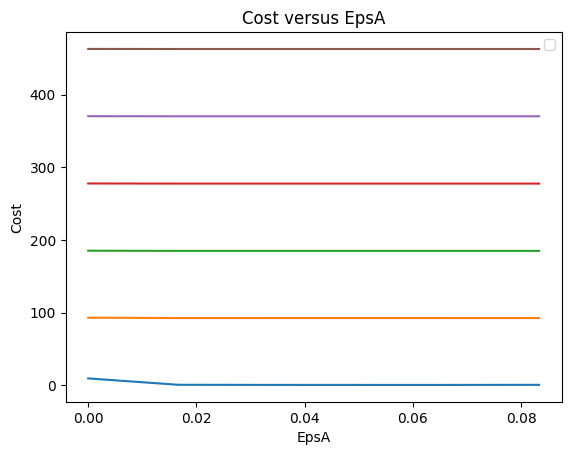

In [7]:
#2D Plots
import matplotlib.pyplot as plt

# Example data
x = EpsA_points
y = Cost_array

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('EpsA')
plt.ylabel('Cost')
plt.title('Cost versus EpsA')

# Add a legend
plt.legend()

# Show the plot
plt.show()

/tmp/ipykernel_47667/1281298945.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


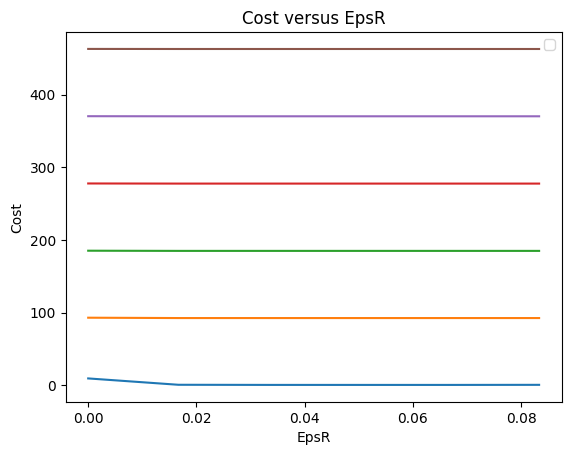

In [8]:
#2D Plots
import matplotlib.pyplot as plt

# Example data
x = EpsR_points
y = Cost_array

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('EpsR')
plt.ylabel('Cost')
plt.title('Cost versus EpsR')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [9]:
#SAVING

import json

data = {
    "EpsA_points": EpsA_points,
    "EpsR_points": EpsR_points,
    "ERR_array": ERR_array,
    "t_array": t_array,
    "speed": speed,
    "ERR_array": ERR_array,
    "Cost_array": Cost_array
}

with open('data.json', 'w') as f:
    json.dump(data, f)


NameError: name 'speed' is not defined